In [94]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/german_credit_data.csv")

In [3]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [4]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [5]:
print("total ",df.shape)
print("train", train.shape)
print("test", test.shape)

total  (1000, 11)
train (700, 11)
test (300, 11)


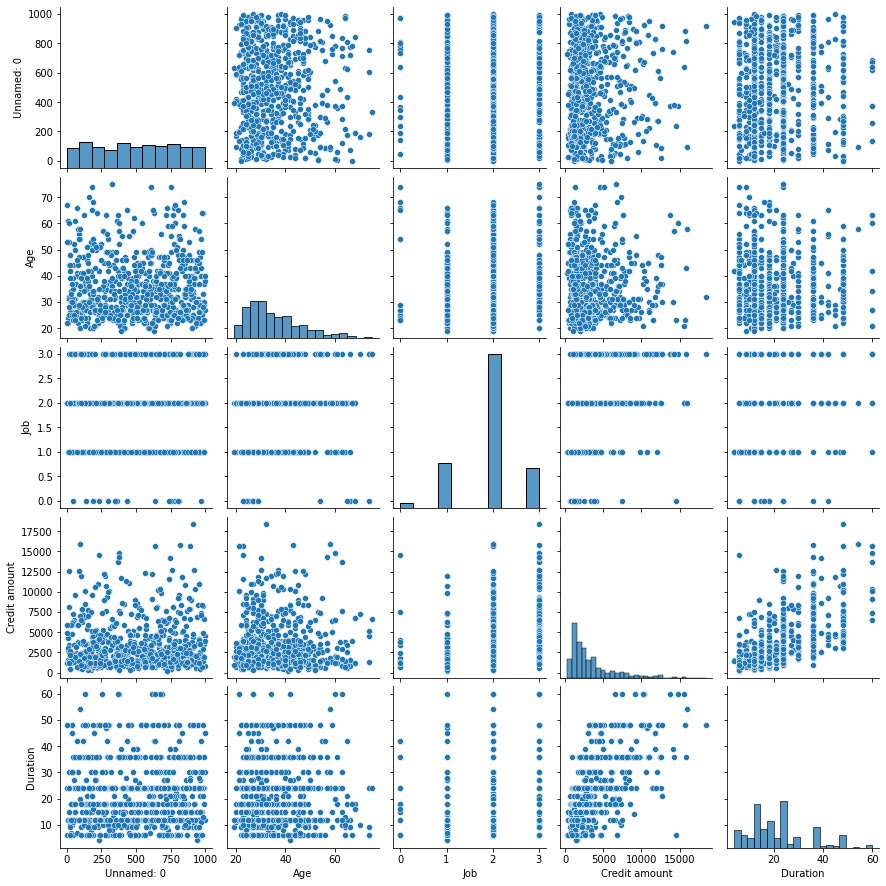

In [6]:
sns.pairplot(train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

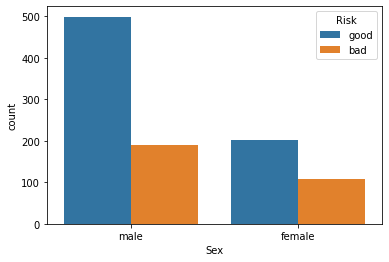

In [7]:
sns.countplot(x="Sex", hue="Risk", data=df)

<AxesSubplot:xlabel='Job', ylabel='count'>

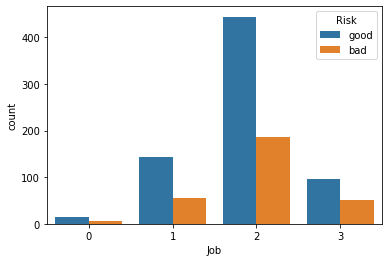

In [19]:
sns.countplot(x="Job", hue="Risk", data=df)

<AxesSubplot:xlabel='Risk', ylabel='Age'>

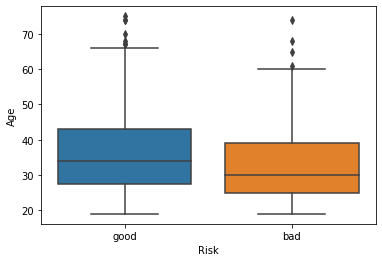

In [8]:
sns.boxplot(data=train, x='Risk', y='Age')

In [10]:
tabla_riesgo_Sex=pd.crosstab(index=train['Risk'], columns=train['Sex'], margins=True)
tabla_riesgo_Job=pd.crosstab(index=train['Risk'], columns=train['Job'], margins=True)
tabla_riesgo_Housing=pd.crosstab(index=train['Risk'], columns=train['Housing'], margins=True)
tabla_riesgo_SavingAc=pd.crosstab(index=train['Risk'], columns=train['Saving accounts'], margins=True)
tabla_riesgo_CheckingAc=pd.crosstab(index=train['Risk'], columns=train['Checking account'], margins=True)
tabla_riesgo_Purpose=pd.crosstab(index=train['Risk'], columns=train['Purpose'], margins=True)

tabla_riesgo_Sex

Sex,female,male,All
Risk,,,
bad,80,129,209
good,142,349,491
All,222,478,700


In [11]:
Rgo_sex_Ind=tabla_riesgo_Sex.loc["bad", :]/tabla_riesgo_Sex.loc["All", :]
Rgo_job_Ind=tabla_riesgo_Job.loc["bad", :]/tabla_riesgo_Job.loc["All", :]
Rgo_housing_Ind=tabla_riesgo_Housing.loc["bad", :]/tabla_riesgo_Housing.loc["All", :]
Rgo_savingAc_Ind=tabla_riesgo_SavingAc.loc["bad", :]/tabla_riesgo_SavingAc.loc["All", :]
Rgo_checkingA_Ind=tabla_riesgo_CheckingAc.loc["bad", :]/tabla_riesgo_CheckingAc.loc["All", :]
Rgo_purpose_Ind=tabla_riesgo_Purpose.loc["bad", :]/tabla_riesgo_Purpose.loc["All", :]
Rgo_sex_Ind

Sex
female    0.360360
male      0.269874
All       0.298571
dtype: float64

<AxesSubplot:xlabel='Sex'>

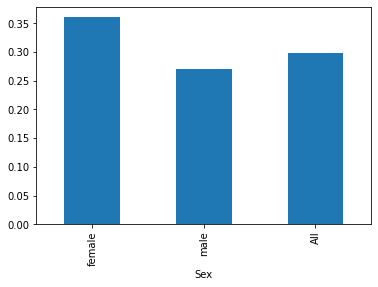

In [12]:
Rgo_sex_Ind.plot(kind='bar')

<BarContainer object of 3 artists>

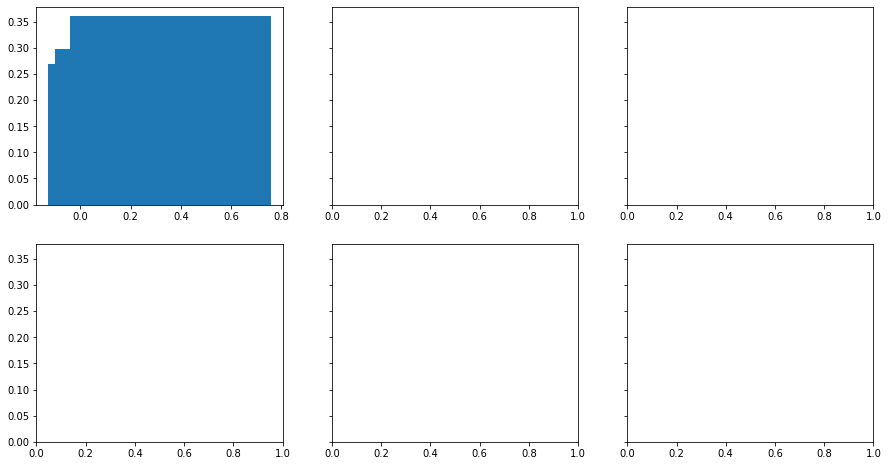

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8), sharey=True)
axs[0,0].bar(Rgo_sex_Ind, Rgo_sex_Ind.iloc[:])

In [69]:
features = ['Sex','Age','Credit amount', 'Housing']
y_train = (train['Risk']=='bad').astype('int') #convierte a binario 1 malos, 0 buenos
x_train = train[features]

In [46]:
#mineria y transformacion de caracteristicas

In [ ]:
#para algunos metodos de machine learning las escalas de los datos deben estar en la misma escala, 
#como K-vecinos, regresion logistica, redes neuronales
#los que no necesitan re escalar son arboles de decision, ramdon forest, exboost

In [70]:
#metodos de creacion masiva de dummies
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [71]:
# para transformar datos categóricos en numéricos
encoder = OneHotEncoder()

In [72]:
# Estregia para llenar datos que faltan
numericImputer = SimpleImputer(strategy='mean')
categoricImputer = SimpleImputer(strategy='most_frequent')

In [73]:
# Usa MinMaxScaler para que todas las variables estén en la misma escala. En este caso [0, 1]
scaler = MinMaxScaler()

In [74]:
# Serie de pasos a aplicar a los datos numéricos
numericPipeline = Pipeline([
    ("imputar_numeros", numericImputer),
    ("escalado", scaler)
])

In [75]:
# Serie de pasos a aplicar a los datos categóricos
categoricalPipeline = Pipeline([
    ("imputar_categorias", categoricImputer),
    ("oneHot", encoder)
])

In [76]:
from sklearn.compose import ColumnTransformer

In [77]:
from sklearn.compose import ColumnTransformer
# indica que pipeline hay que aplicarle a cada columna
transformer =\
ColumnTransformer([("pipeline numerico", numericPipeline, [1, 2]),
                   ("pipeline categorico", categoricalPipeline, [0, 3])
                ])

In [78]:
import numpy as np

In [79]:
X_train_transform = transformer.fit_transform(x_train)#encuentra la media para escalar
#se pierden las etiquetas porque ahora es un objeto numpy, la tabla original es pandas
#encuentra los parametros de escalado para cada una de las variables como media, min, max

In [80]:
X_train_transform

array([[0.73214286, 0.09805216, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.35714286, 0.08990866, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.67857143, 0.18553978, 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.14285714, 0.30560141, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.10714286, 0.0678992 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.08928571, 0.03752614, 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [81]:
X_train_transform.shape

(700, 7)

In [82]:
transformer.transform([['male', 46, 2000, 'own']])
#ejemplo de como se transforman nuevos datos

c:\users\diana\onedrive\mia\dsi02\modelocredito\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\users\diana\onedrive\mia\dsi02\modelocredito\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[0.48214286, 0.09629141, 0.        , 1.        , 0.        ,
        1.        , 0.        ]])

In [83]:
transformer.transform([[np.nan, np.nan, 1000, 'free']])
#ejemplo de como se transforman nuevos datos con vacios

c:\users\diana\onedrive\mia\dsi02\modelocredito\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\users\diana\onedrive\mia\dsi02\modelocredito\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[0.29451531, 0.04126775, 0.        , 1.        , 1.        ,
        0.        , 0.        ]])

In [84]:
transformer

ColumnTransformer(transformers=[('pipeline numerico',
                                 Pipeline(steps=[('imputar_numeros',
                                                  SimpleImputer()),
                                                 ('escalado', MinMaxScaler())]),
                                 [1, 2]),
                                ('pipeline categorico',
                                 Pipeline(steps=[('imputar_categorias',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('oneHot', OneHotEncoder())]),
                                 [0, 3])])

In [85]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
#estos son modelos de arboles binarios

In [86]:
clf = DecisionTreeClassifier(max_depth=4) #4 es el tamaño de las ramas
clf.fit(X_train_transform, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.5089285714285714, 0.9, 'credit amount <= 0.418\ngini = 0.419\nsamples = 700\nvalue = [491, 209]'),
 Text(0.2857142857142857, 0.7, 'age <= 0.116\ngini = 0.397\nsamples = 638\nvalue = [464, 174]'),
 Text(0.14285714285714285, 0.5, 'credit amount <= 0.207\ngini = 0.49\nsamples = 116\nvalue = [66, 50]'),
 Text(0.07142857142857142, 0.3, 'credit amount <= 0.177\ngini = 0.482\nsamples = 101\nvalue = [60, 41]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.494\nsamples = 92\nvalue = [51, 41]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.21428571428571427, 0.3, 'credit amount <= 0.264\ngini = 0.48\nsamples = 15\nvalue = [6, 9]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.25, 0.1, 'gini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.42857142857142855, 0.5, 'is_free <= 0.5\ngini = 0.362\nsamples = 522\nvalue = [398, 124]'),
 Text(0.35714285714285715, 0.3, 'age <= 0.277\ngini = 0.34\nsamples = 465\nvalue = [364

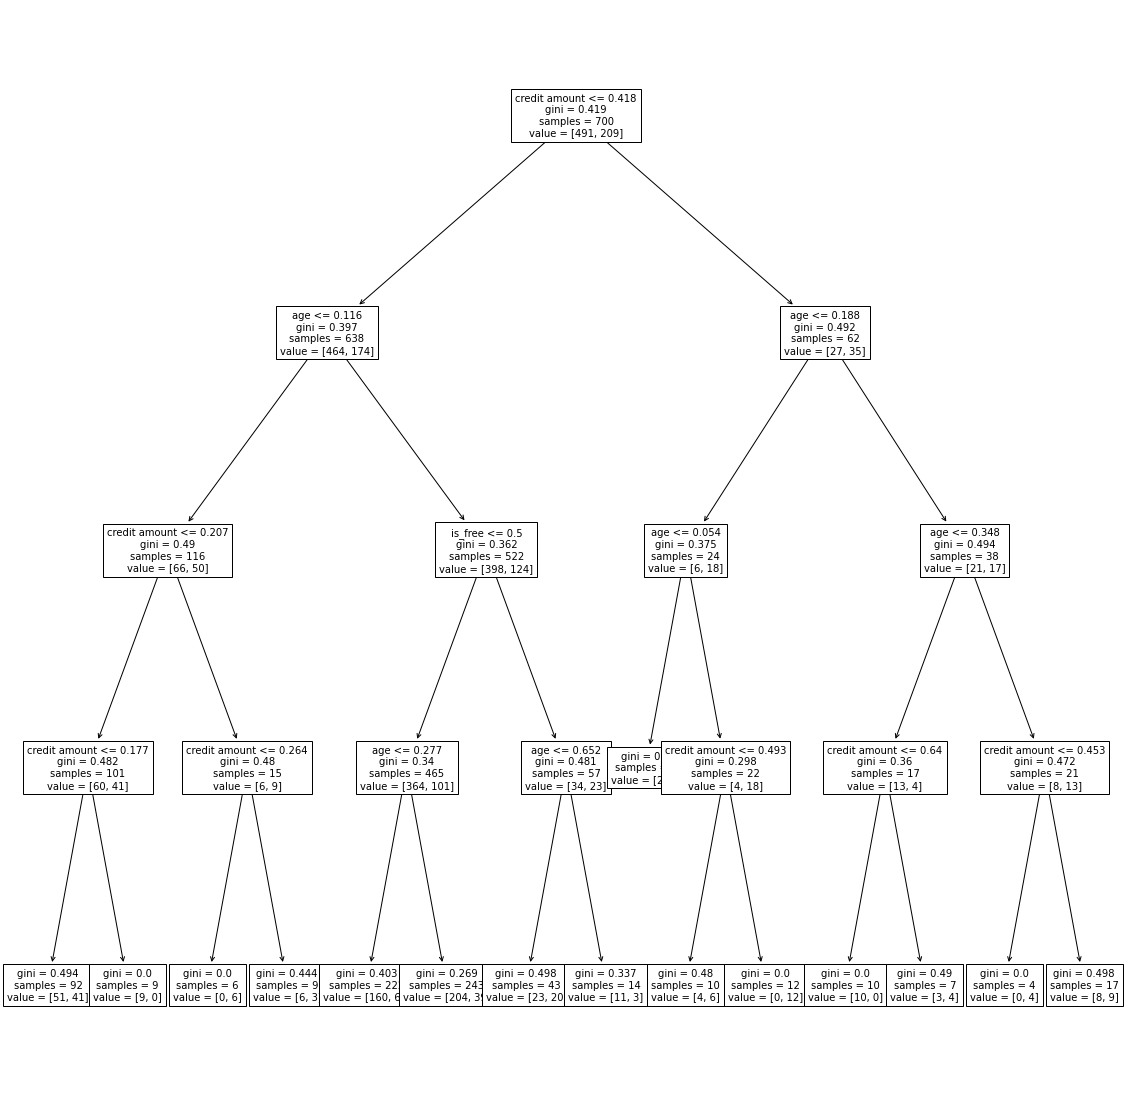

In [88]:
plt.figure(figsize=(20,20))
plot_tree(clf, 
          feature_names=['age', 'credit amount', 'is_female', 'is_male', 'is_free', 'is_own', 'is_rent'],
          fontsize=10)

In [90]:
import joblib

In [93]:
#se guarda pipeline de tranaforamcion como archivo binario
joblib.dump(transformer,"../modelos/pipelines/pipelines1.joblib")

['../modelos/pipelines/pipelines1.joblib']